# **Gradient Boosting Algorithm**

**Group 5**:
* Bayon, Jiannah Alyssa V.
* Fabro, Kate Alexandra R.
* Go, Michael Anthony Gabriel L.
* Seagan, Joshua Miguel V.

# **Load Dataset**

In [ ]:
 # Importing kagglehub library to access stroke prediction dataset
import kagglehub

# Downloading latest version
path = kagglehub.dataset_download("fedesoriano/stroke-prediction-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/fedesoriano/stroke-prediction-dataset/versions/1


In [ ]:
# Importing pandas for preprocessing
import pandas as pd

# Specifying the file path and load the CSV
file_path = f"{path}/healthcare-dataset-stroke-data.csv"
data = pd.read_csv(file_path)
df = data

# Displaying the DataFrame
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# **Explanatory Data Analysis (EDA)**

In [ ]:
# Showing summary statistics
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


 * The **avg_glucose_level** shows a maximum value of 271.74, which is unusually high compared to its mean of 106.15 and standard deviation of 45.28, suggesting it could be an outlier, as glucose levels in healthy individuals rarely exceed 200.

 * Similarly, the **bmi** variable has extreme values, with a minimum of 10.3 (very low) and a maximum of 97.6 (extremely high), which are unlikely in most real-world scenarios and could either represent rare cases or data entry errors.

In [ ]:
# Showing total null values for each column
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


Upon checking, **bmi** is the only column containing null values

In [ ]:
# Dataframe including all observations with NaN (null) attribute for the BMI feature
df_null = df[df['bmi'].isnull()]
df_null

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [ ]:
# Dropping id column
df = df.drop("id",axis = 1)

In [ ]:
# Check unique values for target column
unique_values = df['stroke'].unique()
print(unique_values)

[1 0]


We calculates the most frequent value (mode) of the stroke column for rows where the bmi column is missing

In [ ]:
# Filter rows where 'bmi' is NaN and get the mode of the 'stroke' column
mode_stroke_nan_bmi = df[df['bmi'].isnull()]['stroke'].mode()[0]
print("Mode of 'stroke' for NaN 'bmi' values:", mode_stroke_nan_bmi)


Mode of 'stroke' for NaN 'bmi' values: 0


In [ ]:
# How many stroke (1) and non-stroke (0) cases are having missing bmi
stroke_counts = df_null['stroke'].value_counts()
print("Number of non-stroke cases (0):", stroke_counts.get(0, 0))
print("Number of stroke cases (1):", stroke_counts.get(1, 0))
print("There are more non-stroke cases for missing bmi values.")

Number of non-stroke cases (0): 161
Number of stroke cases (1): 40
There are more non-stroke cases for missing bmi values.


For handling the missing values, we use KNN nearest neighbour by replacing them with the average values of the nearest three neighbors based on the existing data

In [ ]:
# Imputing for missing  data using K-Nearest Neighbors
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors= 3)

imputed_data = knn_imputer.fit_transform(df [['bmi']] )
df['bmi'] = imputed_data

df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


To recheck if the imputation effectively replaced the null values

In [ ]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0
smoking_status,0


# **Data Encoding & Scaling**

In [ ]:
# Importing LabelEncoder for treating categorical data
from sklearn.preprocessing import LabelEncoder

We convert categorical variables (columns with object data type) into numerical values

In [ ]:
# Encode using Label Encoder
encoder = LabelEncoder()
for col_name in df.columns:

    if df[col_name].dtype == "object":
        df[col_name] = encoder.fit_transform(df[[col_name]])

df

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [ ]:
df.nunique()

,0
gender,3
age,104
hypertension,2
heart_disease,2
ever_married,2
work_type,5
Residence_type,2
avg_glucose_level,3979
bmi,419
smoking_status,4


We then normalize numerical columns with more than 5 unique values

In [ ]:
# Importing MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Apply MinMaxScaler for columns with more than 5 unique values
for col_name in df.columns:
    if df[col_name].nunique() > 5:
        df[col_name] = scaler.fit_transform(df[[col_name]])
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,0.816895,0,1,1,2,1,0.801265,0.301260,1,1
1,0,0.743652,0,0,1,3,0,0.679023,0.212981,2,1
2,1,0.975586,0,1,1,2,0,0.234512,0.254296,2,1
3,0,0.597168,0,0,1,2,1,0.536008,0.276060,3,1
4,0,0.963379,1,0,1,3,0,0.549349,0.156930,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,0.975586,1,0,1,2,1,0.132167,0.212981,2,0
5106,0,0.987793,0,0,1,3,1,0.323516,0.340206,2,0
5107,0,0.426270,0,0,1,3,0,0.128658,0.232532,2,0
5108,1,0.621582,0,0,1,2,0,0.513203,0.175258,1,0


## **Imbalanced Data: SMOTE Technique**

<ipython-input-16-ebd9bcc851a3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stroke', data=df, palette='pastel')


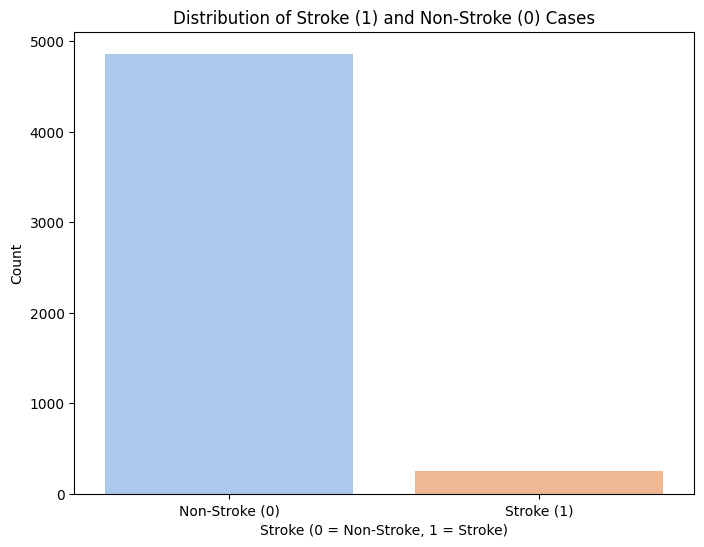

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the 'df' DataFrame is loaded and 'stroke' column exists
plt.figure(figsize=(8, 6))
sns.countplot(x='stroke', data=df, palette='pastel')
plt.title('Distribution of Stroke (1) and Non-Stroke (0) Cases')
plt.xlabel('Stroke (0 = Non-Stroke, 1 = Stroke)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-Stroke (0)', 'Stroke (1)'])
plt.show()


Given that our dataset is imbalanced we apply SMOTE technique to

In [ ]:
# Dealing with imbalanced data using SMOTE
!pip install scikit-learn==1.1.3
!pip install imbalanced-learn==0.11.0

# Importing SMOTE
from imblearn.over_sampling import SMOTE

X = df.drop('stroke', axis=1)
y = df['stroke']

# Implementing SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X = X_resampled
y = y_resampled

print("\nClass distribution after SMOTE:")
print(y.value_counts())

  Using cached imbalanced_learn-0.11.0-py3-none-any.whl.metadata (8.3 kB)
Using cached imbalanced_learn-0.11.0-py3-none-any.whl (235 kB)
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.12.4
    Uninstalling imbalanced-learn-0.12.4:
      Successfully uninstalled imbalanced-learn-0.12.4

Class distribution after SMOTE:
stroke
1    4861
0    4861
Name: count, dtype: int64


# **Gradient Boosting**
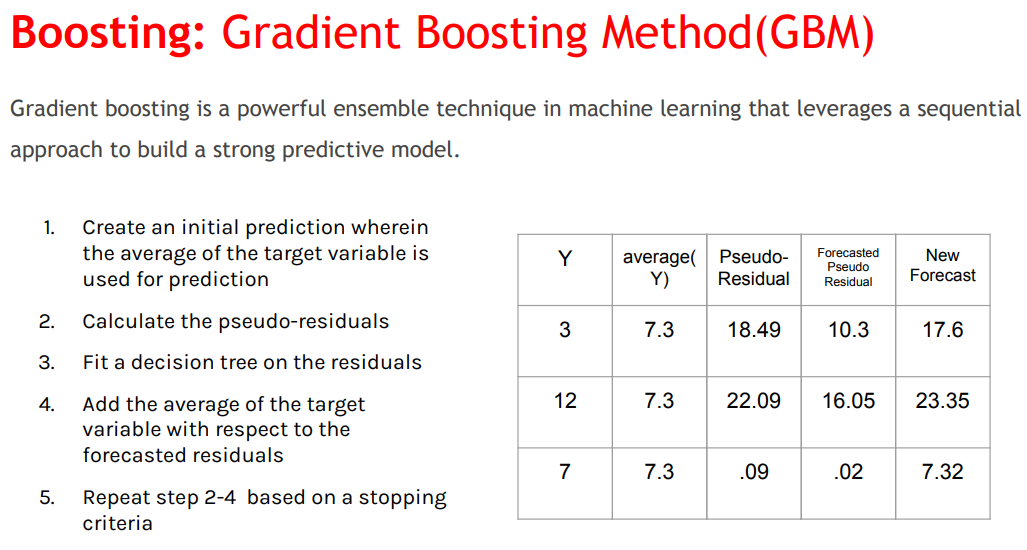

A **Gradient Boosting Method** is all about its ability to increase the predictive performance of the model. Models (weak learners) are sequentially built (decison trees) on correctness of the model in the past (residuals). All weak learners are combined into the final model, which minimizes a loss function by being a weighted sum of them.



Splitting Dataset

In [ ]:
# Importing train/test splitting function
from sklearn.model_selection import train_test_split

# function to split df into train and test sets, with column 'stroke' as target variable
def split_data(df, target='stroke'):
    # dataframe without the target column
    X = df.drop(columns=[target])
    # target column
    y = df[target]
    # splitting
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # returns the train and test sets in tuple format
    return X_train, X_test, y_train, y_test

Step 1: Initialize model predictions

In [ ]:
# importing numpy library
import numpy as np

# inputs y as target vector and uses mean of y for returning an array of predictions
def initialize_predictions(y):
    return np.full(y.shape, y.mean())

Step 2: Compute residuals (pseudo-residuals)
    
    Parameters:
    - y: Actual target values
    - y_pred: Current predictions
    

In [ ]:
# function for computing residuals using the actual y values and the predicted y values
def compute_residuals(y, y_pred):
    return y - y_pred

Step 3: Fit a simple decision stump (1-level tree)


In [ ]:
# function with X and the residuals from the previous function as inputs for fitting a decision stump
def fit_stump(X, residuals):
    # identifying features that are highly correlated with the residuals
    feature = np.argmax(np.abs(np.corrcoef(X.T, residuals)[-1, :-1]))
    # median value of feature as threshold
    threshold = np.median(X.iloc[:, feature])
    # Calculate predictions for above and below the threshold
    prediction = np.where(X.iloc[:, feature] > threshold, residuals.mean(), -residuals.mean())
    # returns index of selected features, the threshold value, and the predictions from the stump
    return feature, threshold, prediction  # Return 3 values

Step 4: Updates predictions by adding the new forecasted residuals, weighted by the learning rate.


    Parameters:
    - y_pred: Current predictions
    - prediction: Forecasted residuals
    - learning_rate: Step size for updates (default is 0.1)


In [ ]:
# function for updating model predictions from the learning rate and the predictions from the previous fit_stump function
def update_predictions(y_pred, prediction, learning_rate=0.1):
    return y_pred + learning_rate * prediction

Performs Gradient Boosting by iteratively fitting a stump on residuals and updating predictions.
    
    Parameters:
    - X_train: Training features
    - y_train: Training target values
    - n_estimators: Number of boosting rounds (default is 50)
    - learning_rate: Learning rate to scale updates (default is 0.1)


In [ ]:
# Function for executing gradient boosting algorithm using the training sets, the number of estimators, and the learning rate
def gradient_boosting(X_train, y_train, n_estimators=50, learning_rate=0.1):
    y_pred = initialize_predictions(y_train)
    stumps = []

    for _ in range(n_estimators):
        # Calculate residuals
        residuals = compute_residuals(y_train, y_pred)

        # Fit a simple model to the residuals
        feature, threshold, prediction = fit_stump(X_train, residuals)  # Adjusted to unpack 3 values
        stumps.append((feature, threshold, prediction))

        # Update predictions
        y_pred = update_predictions(y_pred, prediction, learning_rate)

    # return final predictions
    return stumps, y_pred

 Makes predictions on the test set using the fitted stumps.
    
    Parameters:
    - X: Test features
    - stumps: List of fitted stumps from training
    - learning_rate: Learning rate used in training (default is 0.1)


In [ ]:
# Function for making predictions on test data
def predict(X, stumps, learning_rate=0.1):
    y_pred = np.zeros(X.shape[0])  # Initialize predictions
    for feature, threshold, prediction in stumps:
        # Creating predictions based on the stump conditions
        stump_pred = np.where(X.iloc[:, feature] > threshold, prediction.mean(), -prediction.mean())
        y_pred += learning_rate * stump_pred  # Updating predictions
    return np.round(y_pred)

  Calculates the accuracy of predictions by comparing with actual values.
    
    Parameters:
    - y_true: Actual target values
    - y_pred: Predicted target values


In [ ]:
# Evaluating accuracy
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [ ]:
# Loading and preprocessing the dataset
X_train, X_test, y_train, y_test = split_data(df)

# Training the model and get the stumps
stumps, y_train_pred = gradient_boosting(X_train, y_train)


In [ ]:
# Calculating and showing test accuracy
y_test_pred = predict(X_test, stumps)
print("Test Accuracy:", accuracy(y_test, y_test_pred))

Test Accuracy: 0.9393346379647749


In [ ]:
print(y_test_pred)

[-0. -0. -0. ...  0.  0.  0.]


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report


# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_test_pred)
print("Classification Report:\n", class_report)

Confusion Matrix:
 [[960   0]
 [ 62   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Model Evaluation**

* The confusion matrix and classification report indicate that the model performs well for predicting non-stroke cases but fails to detect stroke cases. With a high accuracy of **94%**, the model correctly identifies 960 non-stroke patients (True Negatives) but misclassifies all 62 stroke cases (False Negatives).

* The precision, recall, and F1-score for stroke (class 1) are all 0.00, highlighting the model's inability to predict strokes. While the macro average metrics (precision, recall, F1-score) are low, the weighted averages are skewed by the large number of non-stroke instances, reflecting the model's bias toward predicting the majority class. This suggests the need for addressing class imbalance to improve stroke detection.








# Conclusion

**Description of the Pseudo Code**

The pseudo-code above is a gradient boosting algorithm applied which predicts whether a patient has experienced a stroke. The process begins with **data splitting**, where the `split_data` function divides the healthcare dataset (`df`) into features (`X`), which represent health-related data like age, blood pressure, and cholesterol levels, and the target variable (`y`), which indicates stroke occurrence. The data is then split into training and testing sets, with 80% used for training and 20% for testing, ensuring that the model learns from one portion of the data and is evaluated on unseen data.

Next, **initialization** sets the baseline predictions (`y_pred`) to the mean of the target variable (`y`) from the training set, assuming all patients have the same probability of a stroke. The compute_residuals function is then used to calculate the residuals, which are the differences between the actual target values (`y`) and the predicted values (y_pred), representing the model's errors that need to be corrected in subsequent iterations.

In the **decision stump fitting** step, the `fit_stump` function identifies the feature most correlated with the residuals, calculates a threshold based on the median value of that feature, and uses this threshold to make predictions based on whether the feature value is above or below the threshold. . For example, a decision stump might learn that "patients over 60 years old with high blood pressure are more likely to have a stroke" and make predictions accordingly. This decision stump plays a key role in refining the model’s predictions with each iteration.

The predictions are adjusted by the **update_predictions** function, which adds the new predictions from the decision stump to the current predictions, weighted by the learning_rate, refining the model iteratively.

The core of the model training occurs in the **gradient boosting process**, where the `gradient_boosting` function trains multiple decision stumps on the residuals and updates the predictions in each iteration. This process repeats for `n_estimators` iterations, which controls the number of stumps used to improve the model's accuracy.

The **predict** function generates predictions for the test data by applying the learned decision stumps to the test features and summing the predictions from all stumps, adjusted by the `learning_rate`. Finally, the **accuracy** function evaluates the model's performance by comparing the predicted stroke occurrences (`y_pred`) with the actual values (`y_true`) from the test set, calculating the proportion of correct predictions, which measures the model's ability to predict stroke likelihood based on healthcare data.

**Hyperparameters**

**`n_estimators`**: This controls the number of decision stumps to train. In healthcare datasets, more stumps can help improve the model's accuracy by making more corrections to the residuals. However, too many iterations might overfit the model. Here, it's set to 50, which provides a balance between model complexity and performance.

**`learning_rate`**: This controls the step size at each iteration when updating predictions. A small learning rate allows the model to learn gradually, which can help prevent overfitting. In this case, the learning rate is set to 0.1, meaning the model will adjust predictions at a moderate pace after each iteration.

Overall, the model achieved a test accuracy of **93.93%**, indicating that it correctly predicted stroke occurrences for approximately 94 out of every 100 patients in the test dataset.





**Difference of Gradient Boosting to Random Forests in terms of forescasting and overall logic**


Gradient Boosting, like Random Forest, is an ensemble machine learning algorithm. Both models combine results from multiple base models to create a stronger overall prediction. The idea is that by aggregating diverse models, the final model surpasses the effectiveness of any single base model. However, while Random Forest builds multiple random decision trees independently and aggregates their results, Gradient Boosting builds trees sequentially, with each iteration aiming to correct the errors of the previous tree. This iterative process allows Gradient Boosting to capture subtle relationships in the data, which is particularly important for forecasting outcomes that depend on complex interactions among variables, such as predicting strokes in this dataset.

Gradient Boosting’s ability to iteratively learn from past iterations makes it highly effective in this dataset. If the initial models aren't able to predict strokes in older individuals with borderline glucose levels, subsequent iterations can focus on correcting this, leading to more accurate predictions. In contrast, Random Forest, while powerful, aggregates trees without considering previous errors, potentially missing subtle but vital interactions.

In terms of overall logic, Random Forest ensures stability and robustness by relying on simple aggregation methods. In contrast, Gradient Boosting directly optimizes a loss function at each step, making it more tailored to the problem at hand. Although Random Forest offers speed and simplicity, this is less critical in this case, where accuracy is paramount. The ability of Gradient Boosting to model complex patterns, coupled with careful hyperparameter tuning to avoid overfitting, makes it the preferred choice for analyzing the connections between various factors and stroke risk.

In critical applications like healthcare, where even small prediction improvements can significantly impact outcomes, Gradient Boosting’s accuracy and ability to provide insights into contributing factors outweigh the benefits of Random Forest’s speed and simplicity.